In [2]:
import cv2
import numpy as np

In [3]:
for i in dir (cv2):
    if "EVENT" in i:
        print(i)

EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP


In [3]:
# creating exor
dataset=[]
def draw(event,x,y,flag,papam):
    if event==cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),3,(255,0,0),3)
    elif event==cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),3,(0,255,0),3)

In [4]:
img=np.zeros((255,255,3),np.uint8)
cv2.namedWindow('window name')
cv2.setMouseCallback('window name',draw)   # mouse fn
while True:
    cv2.imshow('window name',img)
    if cv2.waitKey(1) & 255==ord('p'):
        break
cv2.destroyAllWindows()

In [5]:
import pandas as pd

In [6]:
import keras

In [7]:
pd.DataFrame(dataset)

,0,1,2
0,10,56,0
1,23,55,0
2,38,51,0
3,49,40,0
4,59,33,0
...,...,...,...
318,200,16,1
319,187,4,1
320,230,8,1
321,78,198,1


In [8]:
df=pd.DataFrame(dataset)
df.head()


,0,1,2
0,10,56,0
1,23,55,0
2,38,51,0
3,49,40,0
4,59,33,0


In [9]:
df.columns=['int_col1','int_col2','Tar_col']

In [10]:
df.head()

,int_col1,int_col2,Tar_col
0,10,56,0
1,23,55,0
2,38,51,0
3,49,40,0
4,59,33,0


In [11]:
df['Tar_col'].value_counts()

0    171
1    152
Name: Tar_col, dtype: int64

In [12]:
X=df[['int_col1','int_col2']]
y=df['Tar_col'].astype('int')

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [49]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [50]:
from keras import Sequential
from keras.layers import Dense,Dropout

In [51]:
from keras.regularizers import L1,L1L2,L2

In [52]:
X_trainp=std.fit_transform(X_train)
X_testp=std.transform(X_test)

In [141]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001),input_dim=2))
model.add(Dense(8,activation="tanh",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(4,activation="tanh",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
#model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))

In [142]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                30        
                                                                 
 dense_44 (Dense)            (None, 8)                 88        
                                                                 
 dense_45 (Dense)            (None, 4)                 36        
                                                                 
 dense_46 (Dense)            (None, 1)                 5         
                                                                 
Total params: 159 (636.00 Byte)
Trainable params: 159 (636.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
model.compile(optimizer=SGD(learning_rate=0.1),loss="binary_crossentropy",metrics=["accuracy"])

In [144]:
X_train.shape

(242, 2)

In [145]:
y_train.shape

(242,)

In [146]:
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD

In [147]:
history=model.fit(X_trainp,y_train,batch_size=10,epochs=20,validation_split=0.1)

Epoch 1/20
22/22 [==============================] - 2s 24ms/step - loss: 0.7533 - accuracy: 0.4931 - val_loss: 0.7382 - val_accuracy: 0.6000
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.7281 - val_loss: 0.6923 - val_accuracy: 0.8000
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6356 - accuracy: 0.9263 - val_loss: 0.6306 - val_accuracy: 0.9600
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.5667 - accuracy: 0.9539 - val_loss: 0.5692 - val_accuracy: 0.9600
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.5042 - accuracy: 0.9677 - val_loss: 0.5105 - val_accuracy: 0.9600
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.4511 - accuracy: 0.9677 - val_loss: 0.4677 - val_accuracy: 0.9600
Epoch 7/20
22/22 [==============================] - 0s 6ms/step - loss: 0.4082 - accuracy: 0.9631 - val_loss: 0.4249 - val_accuracy: 0.9600
Epoch 8/20
22/22 [=

In [148]:
import matplotlib.pyplot as plt

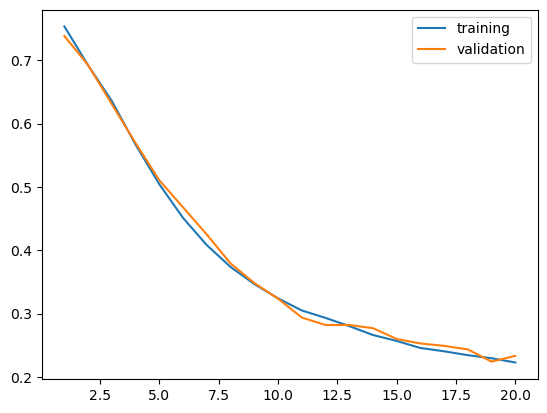

In [149]:
plt.plot(range(1,21),history.history["loss"],label='training')
plt.plot(range(1,21),history.history['val_loss'],label='validation')
plt.legend()

In [150]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 25s 3ms/step


<AxesSubplot:>

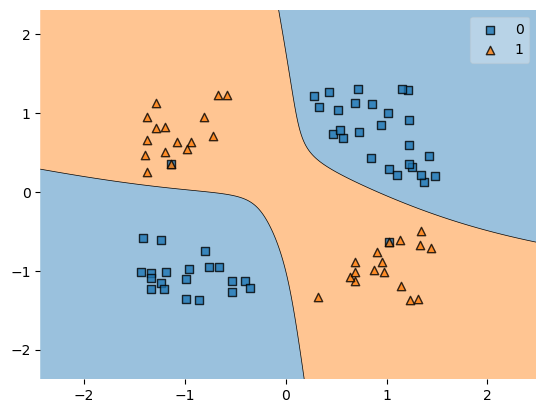

In [151]:
plot_decision_regions(X_testp,y_test.values,clf=model)